# 第5章 Logistic回归

## 5.1 基于Logistic回归和Sigmoid函数的分类

$$\sigma(z)=\frac{1}{1+e^{-z}}$$

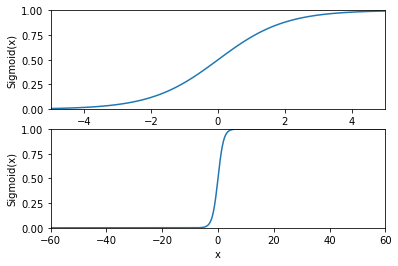

In [2]:
from pylab import *

t = arange(-60.0, 60.3, 0.1)
s = 1/(1 + exp(-t))
ax = subplot(211)
ax.plot(t,s)
ax.axis([-5,5,0,1])
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
ax = subplot(212)
ax.plot(t,s)
ax.axis([-60,60,0,1])
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
show()

## 5.2 基于最优化方法的最佳回归系数确定

### 5.2.1 梯度上升法

### 5.2.2 训练算法：使用梯度上升找到最佳参数

In [8]:
from numpy import *

In [9]:
#程序清单5-1  Logistic回归梯度上升优化算法
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)             #convert to NumPy matrix
    labelMat = mat(classLabels).transpose() #convert to NumPy matrix
    m,n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult
        error = (labelMat - h)              #vector subtraction
        weights = weights + alpha * dataMatrix.transpose()* error #matrix mult
    return weights

In [10]:
dataArr,labelMat=loadDataSet()
gradAscent(dataArr,labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

### 5.2.3 分析数据：画出决策边界

In [15]:
#程序清单5-2 画出数据集和Logistic回归最佳拟合直线的函数
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

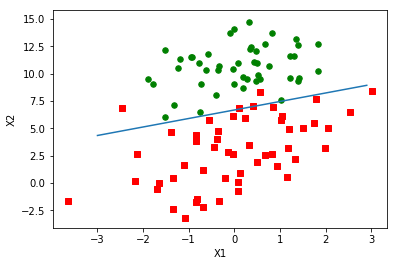

In [16]:
plotBestFit(gradAscent(dataArr,labelMat).getA())

### 5.2.4 训练算法：随机梯度上升

In [17]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)   #initialize to all ones
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

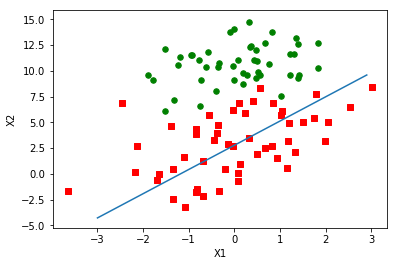

In [19]:
dataArr,labelMat=loadDataSet()
weights=stocGradAscent0(array(dataArr) , labelMat)
plotBestFit(weights)

## 5.3 示例：从疝气病症预测病马的死亡率